In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\Iris.csv", index_col= 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:,:-1]
y= df['Species']

In [4]:
le = LabelEncoder()

y = le.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2, random_state=1)

In [6]:
dt = DecisionTreeClassifier(criterion='gini')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [8]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.9666666666666667

# CART (Regression)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [12]:
x = df.iloc[:,:3]
y = df['PetalWidthCm']


In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2, random_state=1)

In [14]:
from sklearn.metrics import r2_score

In [15]:
dt = DecisionTreeRegressor()

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

r2_score(ytest,ypred)

0.8664764916139676

In [16]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.9984722151491442


0.8664764916139676

### Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeRegressor()

In [21]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter': ['best', 'random'],
    'max_depth' : [2,3,4,5,6,7,8,9]

}

In [22]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid= params)

In [23]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [24]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'splitter': 'random'}

In [26]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth= 4, splitter= 'random')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)


0.9495189996923642


0.9301658262840761

In [27]:
plt.rcParams['figure.figsize']= (20,20)
plt.rcParams['figure.dpi'] = 300

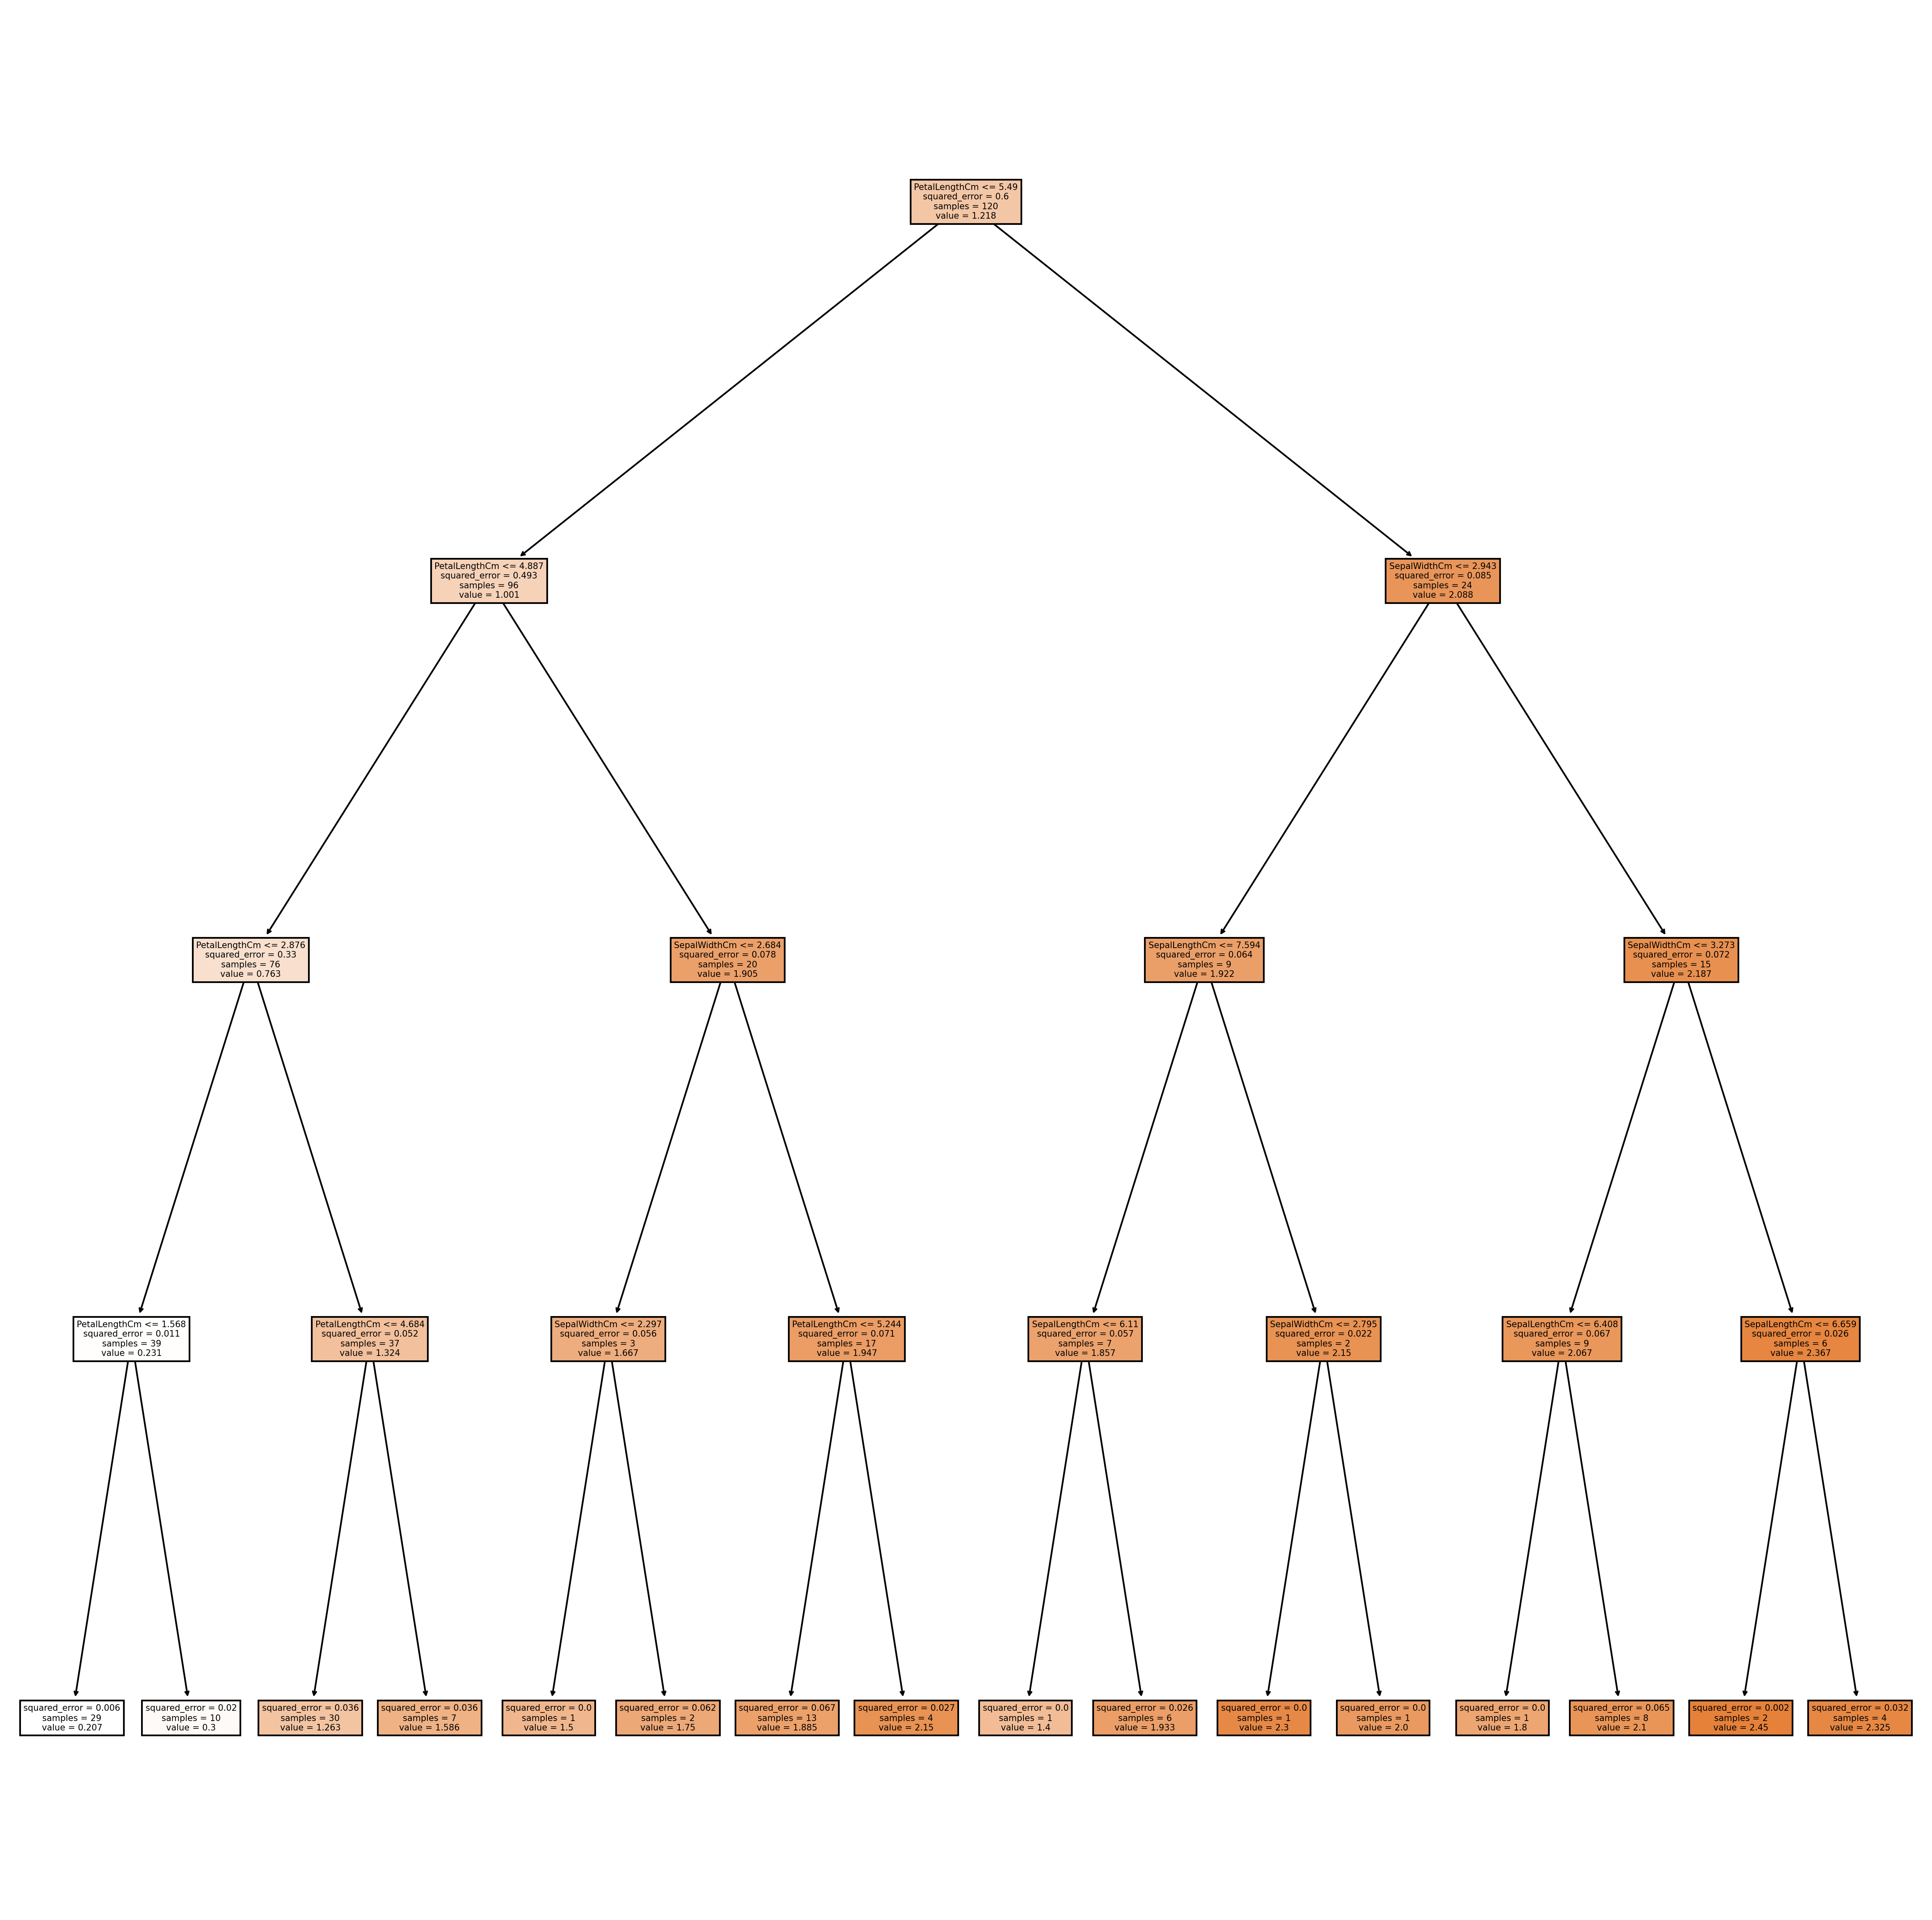

In [29]:
tree.plot_tree(dt, feature_names= x.columns, filled= True)
plt.show()